## Description

This is a small kernel that does data exploration of the Titanic:Machine Learning from Disaster dataset, which was obtained from Kaggle. The goal of the Kaggle challenge using this dataset is to use machine learning to predict whether a person survived or not. This is thus a binary classification task.

The data is split into a training set (train.csv) and a test set (test.csv).

The data set is composed of 10 variables: survival, pclass, sex, age, sibsp, parch, ticket, fare, cabin, and embarkedPort.

Description of the 10 variables given are as follows:
* survival - yes coded as "1", no coded as "0"
* pclass - a rating is given to individuals based on their socioeconomic class: Upper ("1"), Middle ("2"), Lower ("3")
* sex - male or female
* age 
* sibsp - number of siblings and spouses
* parch - number of parents and children
* ticket - ticket number
* fare - cost of ticket
* cabin - cabin number
* embarkedPort - symbol indicating the port at which individuals embarked



### FIrst steps

The first step is to import required libraries, and to read the files into a pandas dataframe.

In [1]:
#setup
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

#for visualization of missing data
import missingno

train_df = pd.read_csv('train.csv')  
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

### Quick look at the data

We can get a quick view of the dataframe's shape (i.e., number of rows, number of columns) and also do a quick visual look at the the first rows in the dataframe.

In [2]:
train_df.shape

(891, 12)

In [3]:
test_df.shape

(418, 11)

In [4]:
#print first five rows of data from 'train.csv' file
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Initial impressions

From the above output, we see that the training data set is composed of 891 rows and 12 columns, and the test dataset is composed of 891 rows and 11 columns. 

We see there is a mix of data that appears to be of different types - type string, int, float. Let's print out a report on the actual types of variables.

In [5]:
train_df.shape
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Checking the data quality

The next step is to determine whether there is any missing data, and if so, how much missing data there is. Then, we will have to decide what to do about the missing data. There are several approaches to dealing with missing data; for example, omitting rows with missing data, using the mean or median of the column's data for the missing data, using interpolation, etc.

In [7]:
#This command will sum the number of rows with missing data for a particular column.
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Additional tools to help with data quality

The above commands seem sufficient for this dataset. But, for cases of much larger datasets, a visual representation may be helpful. The package missingno will plot missing values. Here, we see the numbebr of missing data points (seen as white lines) for a sample of 500 rows.

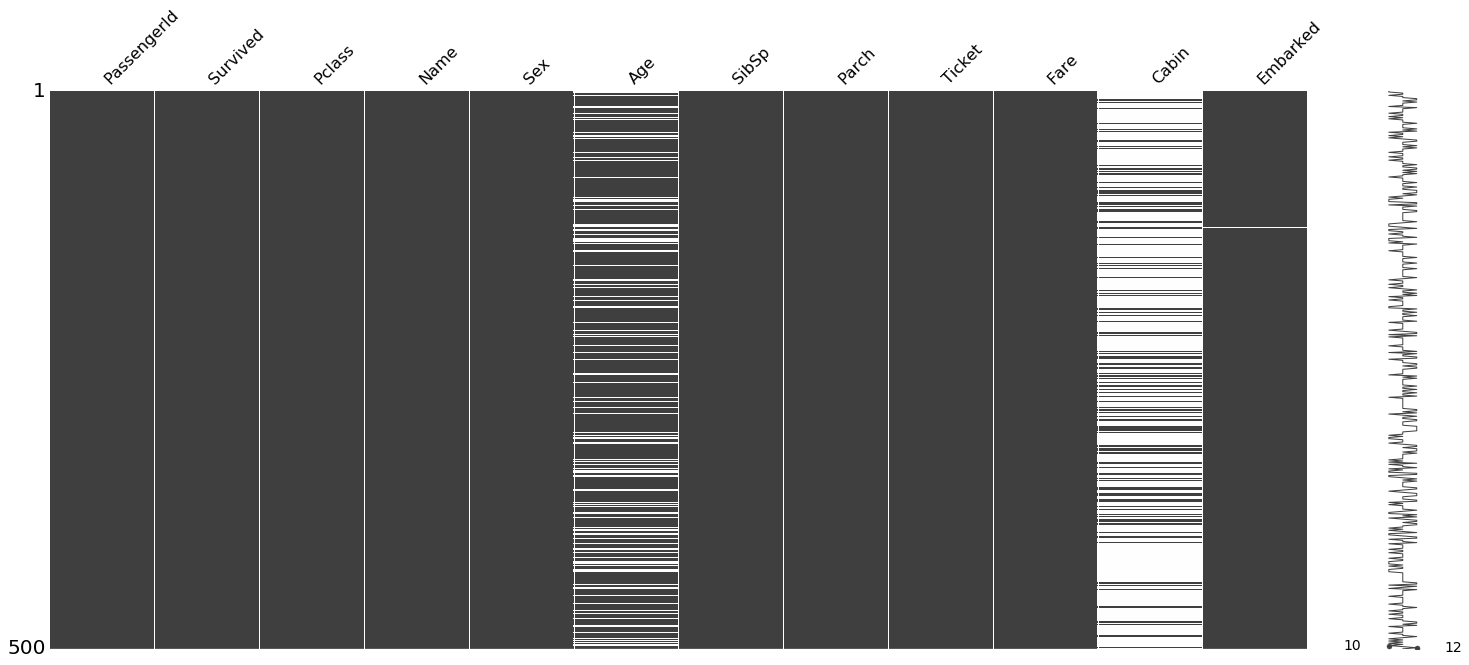

In [9]:
missingno.matrix(train_df.sample(500))

Using the same package, we can visualize the the presence vs. absence of data with a bar chart. Again, this is for a 500 row sample. We see that only 405 out of 500 rows have an "age" value.

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


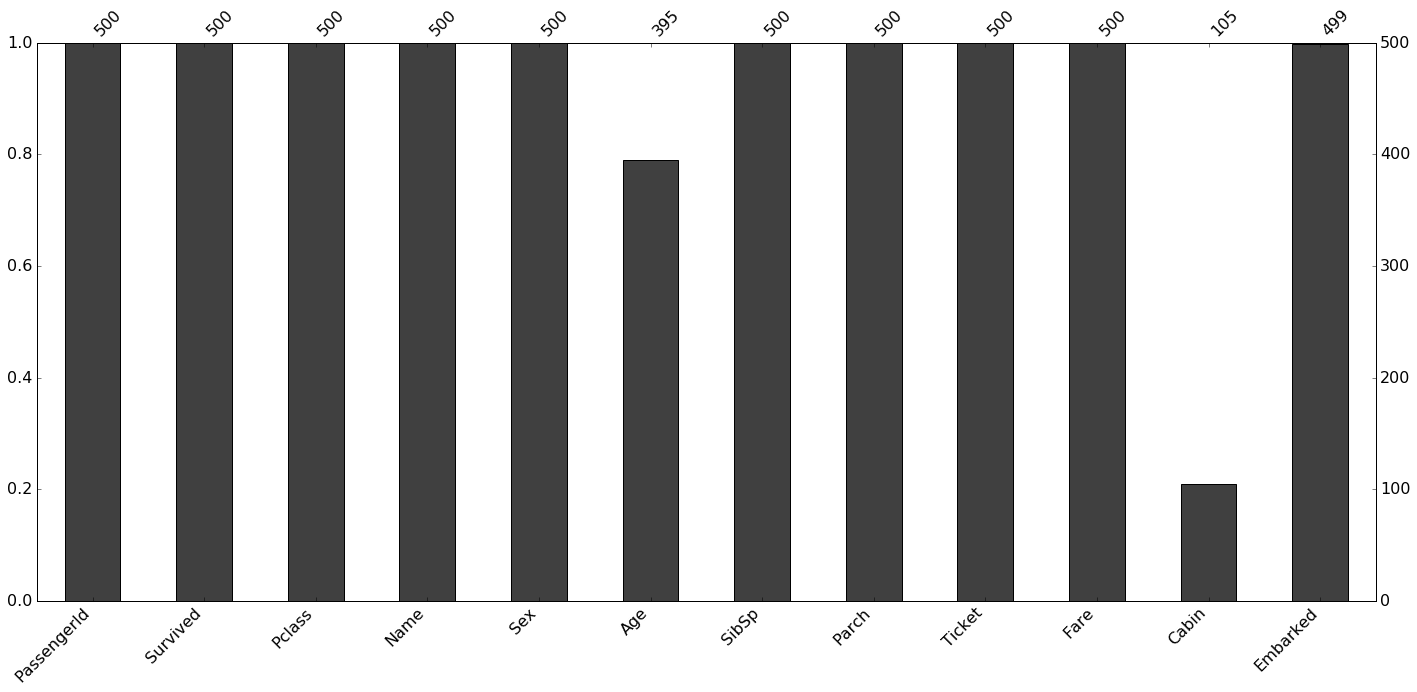

In [10]:
missingno.bar(train_df.sample(500))

We will have to "clean up" our data and take care of the missing values. Since we will be modifying the data set, this means we will be ourselves making decisions about what is and what is not important in our dataset. We'll do that step in the next jupyter notebook.